<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>

# Regresión logística

- Primer caso base de clasificación
- Usaremos el modelo de regresión logística que se conecta con regresión

## Versión v.1.0.0

- Agregada teoría sobre verosimilitud

El notebook lo puedo modificar, esta versión es la v.1.0.0 a 27/11/2024 a la  9 a.m de Caracas.

## Bibliografía

Página 139-145 ISLP

## Contacto

* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

In [ ]:
!pip install tldraw

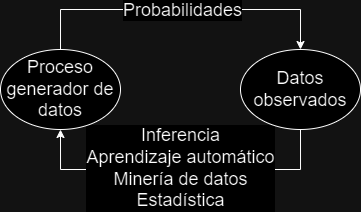

1. All of Statistics: A concise course in Statistical Inference
1. Larry Wasserman

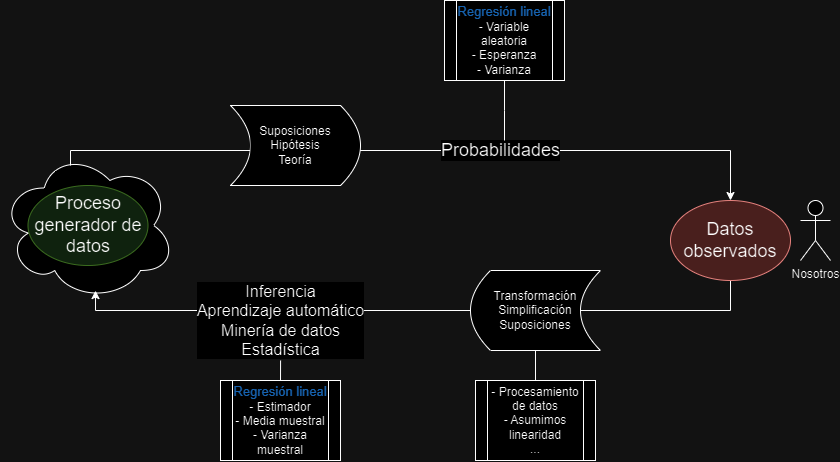





# Clasificación

Recordemos que buscamos una función $f$ sobre un conjunto de *clases* que podemos llamar $C$ que es discreto y finito.

Color de ojo $\in \text{marrón} ,\text{azul},\text{verde}$

- Dado un vector de características $x \in X$ y una respuesta cualitativa $y$ tomando valores en el conjunto $\mathcal{C}$, la tarea de clasificación es construir una función $f$ que podemos llamar $C(x)$ que tome como entrada el vector de características $x$ y predice su valor para $y$; es decir, $C(x) \in \mathcal{C}$.
- Muchas veces estamos más interesados ​​en estimar las probabilidades de que $x$ pertenezca a cada categoría en $\mathcal{C}$.

## Clasificación Binaria

Si $|C|=2$ decimos que estamos en un escenario de clasificación binaria. Normalmente, los valores de $C$ son $\{-1, 1\}$ o $\{0, 1\}$ dependiendo de la utilidad en la formulación del problema.

Veamos el caso más sencillo de clasificación en el escenario de clasificación binaria que conecta un poco con *regresión lineal*

# Regresión Logística

## El modelo lineal

Recordemos el caso de regresión donde la función $f$ es:

$$f(x) = x^T\beta = \beta^T x \text{ para algún } x \in X$$

siendo $X \in \mathbb{R}^{n, p}$ nuestro conjunto de datos que denominamos *matriz de datos*

La solución cerrada (ecuaciones normales) para conseguir *el mejor modelo* para $\beta \in \mathbb{R}^p$ es: $$\beta^* = (X^T X)^{-1}X^Ty$$

siendo $y \in \mathbb{R}^n $ el vector de respuestas de nuestro dataset $(X, y)$

## Discusión sobre clasificación

Cómo podríamos clasicar datos asumiendo que el setup:

1. Matriz de datos $X$
1. la variable a predecir es $y \in \{0, 1\}$

Para simplificar la idea, asumamos que $X \in \mathbb{R}$

In [ ]:
#@ plot_curve(f, _params=[], _range=(-5, 5), _points=100)

import matplotlib.pyplot as plt

def plot_curve(f, _params=[], _range=(-5, 5), _points=100):
  """
  Método para graficar una curva f(x) cuyos parámetros fijos son _params en el rango _range(min, max) usando subsampling de _points

  :param f: La función a graficar
  :param _params: Los parámetros fijos de la función
  :param _range: El rango de X (min, max)
  :param _points: Número de puntos donde vamos a subsamplear a f

  :returns: Nada
  """
  X = np.linspace(_range[0], _range[1], _points)
  plt.plot(X, np.array(list(map(lambda x: f(x, *_params), X))))

## La función logística

Conocida también como curva sigmoide:

$$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$


1. Qué valores usaríamos nosotros?


In [ ]:
import numpy as np

In [ ]:
plot_curve(f, _params=[], _range=(-5, 5), _points=100)

In [ ]:
f = lambda x, L, k, x0: L/(1.0 + np.exp(-1.0*k*(x-x0)))

In [ ]:
def f(x, L, k, x0):
  return L/(1.0 + np.exp(-1.0*k*(x-x0))


$$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$



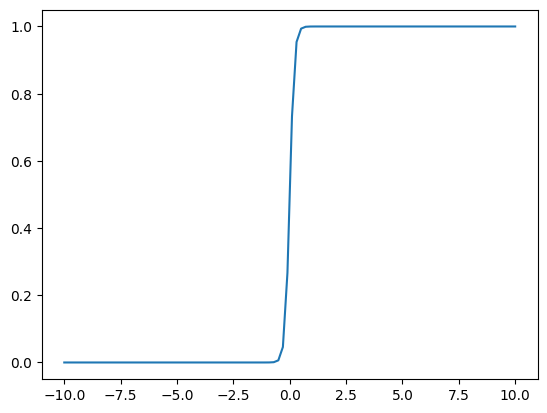

In [ ]:
plot_curve(f, (1, 10, 0), _range=(-10, 10))

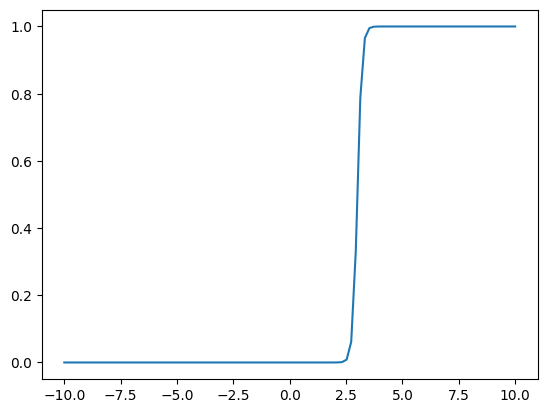

In [ ]:
plot_curve(f, (1, 10, 3), _range=(-10, 10))

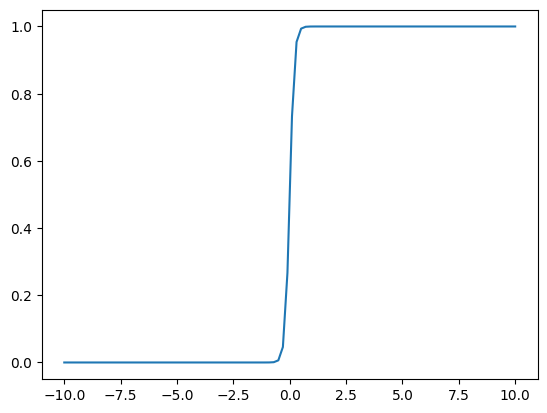

In [ ]:
plot_curve(f, (1, 10, 0), _range=(-10, 10))

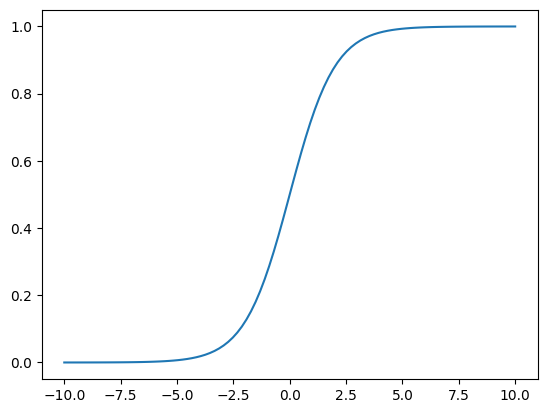

In [ ]:
plot_curve(f, (1, 1, 0), _range=(-10, 10))

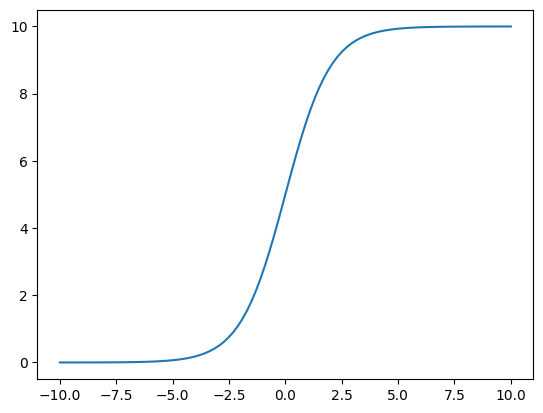

In [ ]:
plot_curve(f, (10, 1, 0), _range=(-10, 10))

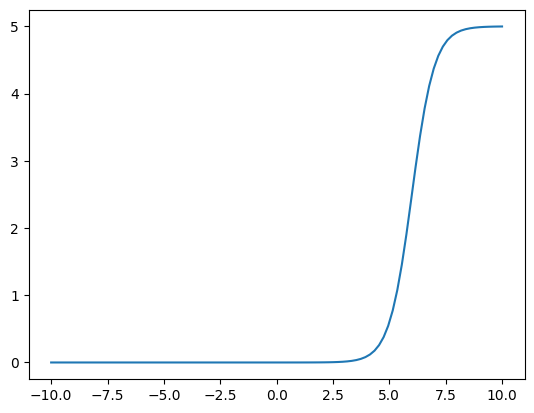

In [ ]:
plot_curve(f, (5, 2, 6), _range=(-10, 10))

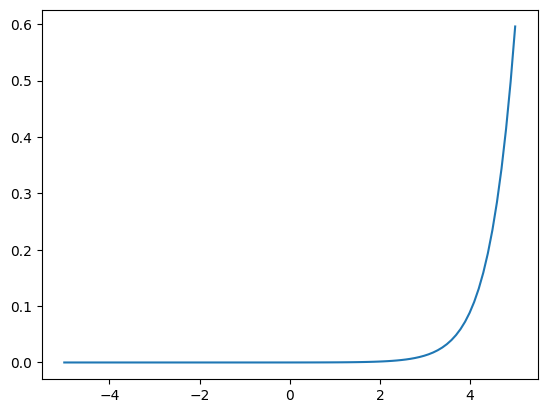

In [ ]:
plot_curve(f, (5, 2, 6))

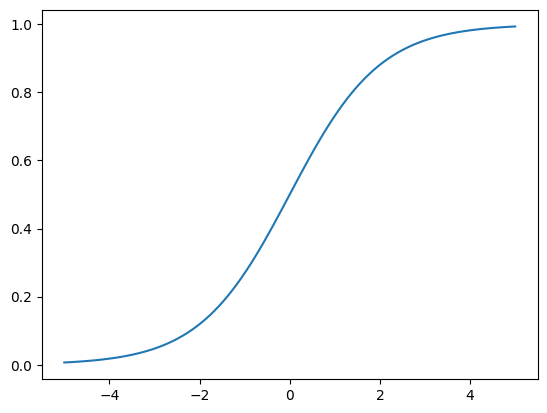

In [ ]:
plot_curve(f, (1, 1, 0), _range=(-5, 5))

### Scipy

In [ ]:
from scipy.stats import logistic
# logistic.cdf -> cummalitive density function

FDA

P(x<=X)

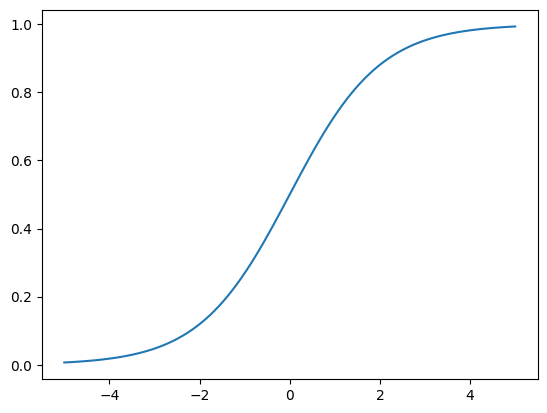

In [ ]:
plot_curve(logistic.cdf)

### Notación en el curso

En el curso, usaremos la definición de curva sigmoide como: $$\sigma(z)=\frac{1}{1+e^{-z}}$$ de donde es fácil demostrar que $$\sigma(z)=\frac{e^{z}}{1+e^{z}}$$


## El modelo logístico

Supongamos que tenemos una matriz de datos $X$ y la variable a predecir es $y \in \{0, 1\}$

En general, buscamos conseguir predecir _la probabilidad_ de que una instancia de nuestro dataset $x_i$ pertenezca a una categoría $0$ o $1$.

Si recordamos definición de probabilidad condicional, queremos $P(y_i| x_i)$ para todo $i$ en el dataset.

Asumamos por simplicidad que $x_i$ es solo una columna.

Buscamos $P(y_i=1 | x_i=a)$ y $P(y_i=0 | x_i=a)$ para decidir si $x_i$ pertenece a la clase $1$ o $0$, respectivamente.




### El caso simple

El caso simple para regresión logística

$$
f_{\beta}(x)=\sigma\left( \beta ^{\top} x \right) = \frac{1}{1+e^{-\beta ^{\top} x}} = \frac{e^{\beta ^{\top} x}}{1+e^{\beta ^{\top} x}} = \frac{e^{\beta_0+\beta_1 x}}{1+e^{\beta_0+\beta_1 x}}
$$

1. Cómo podemos reescribir la definición que tenemos? $$ f_{\beta}(x)=\frac{L}{1+e^{-k\left(x-x_0\right)}}$$



### Noción importante

Con manipulaciones simples, podemos demostrar que:

$$\frac{f_{\beta}(x)}{1-f_{\beta}(x)}=e^{\beta_0+\beta_1 x}$$

Por lo que,

$$\log \left(\frac{f_{\beta}(x)}{1-f_{\beta}(x)}\right)=\beta_0+\beta_1 x$$

Esta forma es conocida como la transformación log odd o logit.

El conocimiento que debemos recordar es: el logaritmo de la proporción entre la probabilidad de que sea 1 o 0 tiene una relación lineal sobre $x$

------

Por ahora sabemos cómo usar una función para poder predecir probabilidades. Para poder conseguir el modelo asociado necesitamos definir ciertas herramientas y construir nuestra función de pérdida $L(\beta)$

## Función de verosimilitud

La función de verosimilitud tiene una interpretación similar a la definición de función densidad de probabilidad condicional (para el caso continuo) o función de probabilidad condicional (para el caso discreto) condicionadas sobre sus parámetros. Es decir, $$f(x | \beta) \text{ o } P(x | \beta)$$

pero asumimos que es una función de los parámetros $\beta$ condicionados a la variable $x$. Es decir, $$f(\beta | x ) \text{ o } P(\beta | x)$$

Es importante mencionar (sin profundizar) que en nuestro curso de probabilidades de computación UCV vimos variables aleatorias con _el enfoque frecuentista_ en el cual asumimos que los parámetros de las variables aleatorias están dados y usábamos como notación $f(x ; \beta)$

### Ejemplos

1. Distribución binomial:
    
  Denotada como $x \sim Bin(n, p)$
  
  Podemos escribir su función de probabilidad como: $$f(x ; \beta) = P(x = k | n, p) $$

  Pero normalmente escribíamos: $$P(X=k)=\binom{n}{k} p^k(1-p)^{n-k}$$

  porque $n$ y $p$ estaban fijas.

1. Distribución exponencial:

   Denotada como $x \sim Exp(\lambda)$

   Podemos escribir su función de densidad de  probabilidad como: $$f(x ; \beta) = f(x | \lambda) $$

   y luego $$P(x\leq t) = \int_{0}^{t} f(s | \lambda) ds   $$

$$f(x ; \lambda)= \begin{cases}\lambda e^{-\lambda x} & x \geq 0 \\ 0 & x<0\end{cases}$$



En nuestro caso, denotaremos la función de verosimilitud como $V(\beta | X)$ donde la data observada es fija y buscamos el mejor "parámetro" posible y este será nuestro modelo.

En la mayoría de casos, la función de verosimilitud se escribe asumiendo independencia entre cada uno de las observaciones disponibles y reutilizando las funciones de densidad o probabilidad para evitar la confusión y solo debemos estar conscientes que la variable de interes es $\beta$ y no $x$.

Imaginen que tenemos para cualquier observación $i$ la probabilidad de predecir $y_i$ con $x_i$. Podemos pensar lo mencionado antes como: $$V(\boldsymbol{\beta} |  x_i) = P\left(y_i \mid \mathbf{x}_i , \boldsymbol{\beta}\right)$$

Como asumimos que cada observación es independiente

$$
\begin{aligned}
V(\boldsymbol{\beta} \mid X) & =V\left(\boldsymbol{\beta} \mid x_1, x_2, \cdots, x_n\right) \\
& =V\left(\boldsymbol{\beta} \mid x_1\right) V\left(\boldsymbol{\beta} \mid x_2\right) \cdots V\left(\boldsymbol{\beta} \mid x_n\right) \\
& =\prod_{i=1}^n V(\boldsymbol{\beta} |  x_i)
\\
& =\prod_{i=1}^n P\left(y_i \mid \mathbf{x}_i, \boldsymbol{\beta}\right)
\end{aligned}
$$






### Verosimilitud en Regresión Logística  

Para el caso de regresión logística, la probabilidad de cada observación es:

$$
P\left(y_i \mid \mathbf{x}_i, \boldsymbol{\beta}\right)= \begin{cases} f_{\beta}(x_i), & \text { if } y_i=1 \\ 1-f_{\beta}(x_i), & \text { if } y_i=0\end{cases}
$$

o podemos usar

$$
P\left(y_i \mid \mathbf{x}_i, \boldsymbol{\beta}\right)= \begin{cases}\sigma\left( \beta ^{\top} x_i \right), & \text { if } y_i=1 \\ 1-\sigma\left( \beta ^{\top} x_i \right), & \text { if } y_i=0\end{cases}
$$

Nos recuerda a algo?

Podemos escribir de manera compacta como:

$$
P\left(y_i \mid \mathbf{x}_i, \boldsymbol{\beta}\right)=f_{\beta}(x_i)^{y_i}\left(1-f_{\beta}(x_i)  \right)^{1-y_i}
$$

Entonces, la función de verosimilitud es:

$$
V(\boldsymbol{\beta} | X)= \prod_{i=1}^n P\left(y_i \mid \mathbf{x}_i, \boldsymbol{\beta}\right) =\prod_{i=1}^n f_{\beta}(x_i)^{y_i}\left(1-f_{\beta}(x_i)  \right)^{1-y_i}
$$

De manera equivalente

$$
V(\boldsymbol{\beta} | X)= \prod_{i=1}^n P\left(y_i \mid \mathbf{x}_i, \boldsymbol{\beta}\right) =\prod_{i=1}^n \sigma\left( \beta ^{\top} x_i \right)^{y_i}\left(1-\sigma\left( \beta ^{\top} x_i \right)  \right)^{1-y_i}
$$

### La log - Verosimilitud

Para construir nuestra función de pérdida es útil simplificar $V(\boldsymbol{\beta} | X)$ como

$$
\ell(\boldsymbol{\theta})=\log V(\boldsymbol{\beta} | X) =\sum_{i=1}^n\left[y_i \log f_{\beta}(x_i)+\left(1-y_i\right) \log \left( 1- \left(f_{\beta}(x_i) \right)\right) \right]
$$

y finalmente

$$J(\beta) = - \ell(\boldsymbol{\theta})$$

por lo que obtenemos

$$L(\beta) = L_{\beta}(X) = -  \sum_{i=1}^n\left[y_i \log f_{\beta}(x_i)+\left(1-y_i\right) \log \left( 1- \left(f_{\beta}(x_i) \right)\right) \right]$$

- Por qué creen que hacemos esto?
- Intenten conseguir $\nabla L\left(\beta\right) $

### Predicción

Una vez que conseguimos el modelo óptimo $\beta^*$, la predicción es:

$$\hat{p}(x_i)=\frac{e^{\beta^*_0+\beta^*_1 x_i}}{1+e^{\beta^*_0+\beta^*_1 x_i}}$$

### Regresión Logística Múltiple

Consideramos ahora el problema de predecir una clase binaria con múltiples predictores. Haciendo analogía y extendiendo la idea de regresión logística simple tenemos:

$$
\log \left(\frac{f_{\beta}(x)}{1-f_{\beta}(x)}\right)= \beta^T x = \beta_0+\beta_1 x_0+\cdots+\beta_p x_p
$$
donde $x=\left(x_1, \ldots, x_p\right)$ son los $p$ predictores. Y la función de predicción es
$$
f_{\beta}(x)=\frac{e^{x^T \beta^* }}{1+e^{x^T \beta^* }}=\frac{e^{\beta_0+\beta_1 x_1+\cdots+\beta_p x_p}}{1+e^{\beta_0+\beta_1 x_1+\cdots+\beta_p x_p}} .
$$



Usaremos el módulo [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.decision_function) de Scikit-Learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

#### Caso binario

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y > 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
y = np.array(y>0).astype(int)

In [ ]:
arr = []
for yi in y:
  if yi == 0:
    arr.append(0)
  else:
    arr.append(1)
np.array(arr)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.array([0 if yi==0 else 1 for yi in y])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# random_state -> "la semilla (seed) de los RNG (random number generators)" -> Reproducibilidad

model = LogisticRegression(max_iter=1000, random_state=0).fit(X, y)

In [ ]:
# penalty = None -> No tener regularización, LASSO y Ridge.
model = LogisticRegression(random_state=0, max_iter=1000, penalty=None).fit(X, y)

In [ ]:
model.predict(X[:2, :])

array([0, 0])

In [ ]:
model.predict(X[:50, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
X[:2, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [ ]:
model.predict_proba(X[:1, :])

array([[9.99999996e-01, 3.94190051e-09]])

In [ ]:
[0.99..9 0]

In [ ]:
model.intercept_

array([-1.18494836])

In [ ]:
model.coef_

array([[-2.02162242, -6.99849918, 11.14813559,  5.15488554]])

$$

##### Estamos haciendo los mismos cálculos?

In [ ]:
X[:1, :] @ model.coef_[0]

array([-18.16665451])

In [ ]:
X[:1, :] @ model.coef_[0] + model.intercept_

array([-19.35160286])

In [ ]:
np.exp(X[:1, :] @ model.coef_[0] + model.intercept_)

array([3.94190053e-09])

Ahora tenemos 4 parámetros por columna `_coef` más el punto de corte `intercept`

$$\hat{p}(x_0)=\frac{e^{x^T \beta^* }}{1+e^{x^T \beta^* }}=\frac{e^{\beta^*_0+\beta^*_1 x_{00}+\beta^*_2 x_{01}+\beta^*_3 x_{02}+\beta^*_1 x_{03}}}{1+e^{\beta^*_0+\beta^*_1 x_{00}+\beta^*_2 x_{01}+\beta^*_3 x_{02}+\beta^*_1 x_{03}}}$$

In [ ]:
np.exp(X[:1, :] @ model.coef_[0] + model.intercept_) / (1 + np.exp(X[:1, :] @ model.coef_[0] + model.intercept_))

array([3.94190051e-09])

$$1-\hat{p}(x_i)=1-\frac{e^{\beta^*_0+\beta^*_1 x_i}}{1+e^{\beta^*_0+\beta^*_1 x_i}}$$

In [ ]:
np.array([1.0]) - np.exp(X[:1, :] @ model.coef_[0] + model.intercept_) / (1 + np.exp(X[:1, :] @ model.coef_[0] + model.intercept_))

array([1.])

### Caso Multinomial

Es posible extender la definición para casos con más de 1 clase y además con $m>1$

Asumamos que $|C| = K$

$$
\operatorname{Pr}(y=k \mid X=x)=\frac{e^{\beta_{k 0}+\beta_{k 1} x_1+\cdots+\beta_{k m} x_m}}{1+\sum_{l=1}^{K-1} e^{\beta_{l 0}+\beta_{l 1} x_1+\cdots+\beta_{l m} x_m}}
$$
para $k=1, \ldots, K-1$, y
$$
\operatorname{Pr}(y=K \mid X=x)=\frac{1}{1+\sum_{l=1}^{K-1} e^{\beta_{l 0}+\beta_{l 1} x_1+\cdots+\beta_{l m} x_m}} .
$$

No es difícil probar que: $k=1, \ldots, K-1$,
$$
\log \left(\frac{\operatorname{Pr}(y=k \mid X=x)}{\operatorname{Pr}(Y=K \mid X=x)}\right)=\beta_{k 0}+\beta_{k 1} x_1+\cdots+\beta_{k m} x_m
$$


In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
X[:2, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [ ]:
model = LogisticRegression(random_state=0, max_iter=10000, penalty=None, multi_class="multinomial").fit(X, y)

In [ ]:
model.predict(X[:2, :])

array([0, 0])

In [ ]:
model.predict_proba(X[:2, :])

array([[1.00000000e+00, 2.09745715e-31, 3.23880813e-58],
       [1.00000000e+00, 1.23379546e-24, 8.80642052e-50]])

In [ ]:
model.score(X, y)

0.9866666666666667

In [ ]:
model.intercept_

array([  3.97751891,  19.33028473, -23.30780364])

In [ ]:
model.coef_

array([[  7.35275466,  20.39784579, -30.26354695, -14.14340745],
       [ -2.44378438,  -6.85846875,  10.41707167,  -2.07137781],
       [ -4.90897028, -13.53937704,  19.84647528,  16.21478526]])